In [ ]:
from hilbert_curve import hilbert_order, draw_curve_on_img
from PIL import Image
import numpy as np
import cv2 as cv
from scipy.stats import skew, kurtosis, entropy, energy_distance
import matplotlib.pyplot as plt

In [ ]:
def pixel_values(img, curve_coordinates):

    curve_pixels = []
    np_img = np.asarray(img)
    
    for coord in curve_coordinates:
        curve_pixels.append(np_img[coord[1], coord[0]])
    
    return curve_pixels

In [ ]:
img = Image.open('../img/clean-bg/motorbike/image_0001.jpg').convert('L')
img

In [ ]:
np.asarray(img)

In [46]:
kp = [10,10]

In [51]:
curves = []
images = []
n = 2

while n <= min(img.size):
    curve_coordinates = hilbert_order(n, img.size)
    draw = draw_curve_on_img(img, n)
    # draw.save(f'../img/hilbert/{n}.png')
    # print(np.sqrt(len(curve)))
    
    if kp in curve_coordinates:
        curve_pixels = pixel_values(img, curve_coordinates)
        curves.append(curve_pixels)
        images.append(draw)
    
    n *= 2

In [57]:
plt.rcParams['figure.figsize'] = [20, 10]

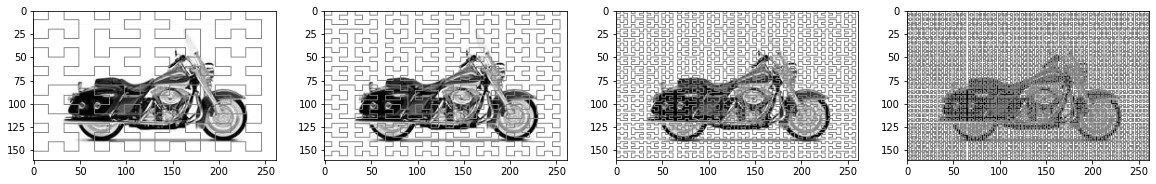

In [58]:
fig, axis = plt.subplots(1, len(images))

for i in range(len(images)):
    axis[i].imshow(images[i], cmap='gray')
plt.show()

In [ ]:
# Diferença de intensidade 
intensity_diff = []

for curve in curves:
    
    intensity_diff_curve = []
    
    for i in range(len(curve)-1):
        intensity_diff_curve.append( abs(int(curve[i+1]) - int(curve[i])) )
    
    intensity_diff.append(intensity_diff_curve)

In [ ]:
# Desvio Padrão
for curve in curves:
    print(np.std(curve))
    
print()
for curve in intensity_diff: 
    print(np.std(curve))
    

In [ ]:
# Assimetria
for curve in curves:
    print(skew(curve))
    
print()
for curve in intensity_diff: 
    print(skew(curve))
    

In [ ]:
# Curtose
for curve in curves:
    print(kurtosis(curve))
    
print()
for curve in intensity_diff: 
    print(kurtosis(curve))
    

In [ ]:
# Entropia
for curve in curves:
    print(entropy(curve))
    
print()
for curve in intensity_diff: 
    print(entropy(curve))
    

In [ ]:
# Energia 
for i in range(len(curves)-1):
    print(energy_distance(curves[i], curves[i+1]))
    
print()
for i in range(len(intensity_diff)-1):
    print(energy_distance(intensity_diff[i], intensity_diff[i+1]))
    
